<a href="https://colab.research.google.com/github/maruthikelgire/My-Practices/blob/main/Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle wordcloud


In [ ]:
!pip install -q wordcloud scikit-learn matplotlib seaborn nltk


In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import joblib
from google.colab import files

In [ ]:
#  Download NLTK stopwords

nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Upload training and validation files

uploaded = files.upload()  # upload twitter_training.csv and twitter_validation.csv

Saving twitter_training.csv to twitter_training (2).csv
Saving twitter_validation.csv to twitter_validation (2).csv


In [ ]:
# Load data
train_df = pd.read_csv("twitter_training.csv", header=None)
val_df = pd.read_csv("twitter_validation.csv", header=None)

In [ ]:
#  Assign column names
columns = ["tweet_id", "entity", "sentiment", "tweet"]
train_df.columns = columns
val_df.columns = columns

In [ ]:
# Optional: Combine both files (or just use train_df alone if preferred)
df = pd.concat([train_df, val_df], ignore_index=True)

In [ ]:
# Keep only "positive", "negative", and "neutral" labels
df = df[df["sentiment"].isin(["Positive", "Negative", "Neutral"])]

In [ ]:
#  Clean tweets
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", "", str(text))  # Remove URLs
    text = re.sub(r"@\w+", "", text)                 # Remove mentions
    text = re.sub(r"#", "", text)                    # Remove hashtags
    text = re.sub(r"[^\w\s]", "", text)              # Remove punctuation
    return text.lower().strip()
df["cleaned_tweet"] = df["tweet"].apply(clean_tweet)

In [ ]:
#  Vectorize tweets using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words)
X = vectorizer.fit_transform(df["cleaned_tweet"])

In [ ]:

# Encode sentiment labels
le = LabelEncoder()
y = le.fit_transform(df["sentiment"])

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#  Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate model
y_pred = model.predict(X_test)

In [ ]:
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


📊 Classification Report:

              precision    recall  f1-score   support

    Negative       0.79      0.78      0.78      4584
     Neutral       0.69      0.71      0.70      3670
    Positive       0.77      0.76      0.76      4250

    accuracy                           0.75     12504
   macro avg       0.75      0.75      0.75     12504
weighted avg       0.75      0.75      0.75     12504

✅ Accuracy: 0.7511196417146513


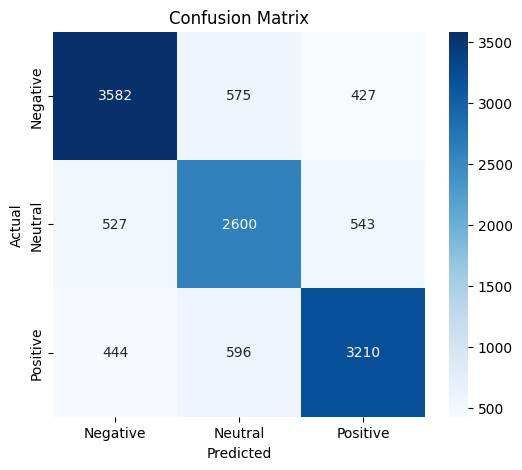

In [ ]:
#  Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

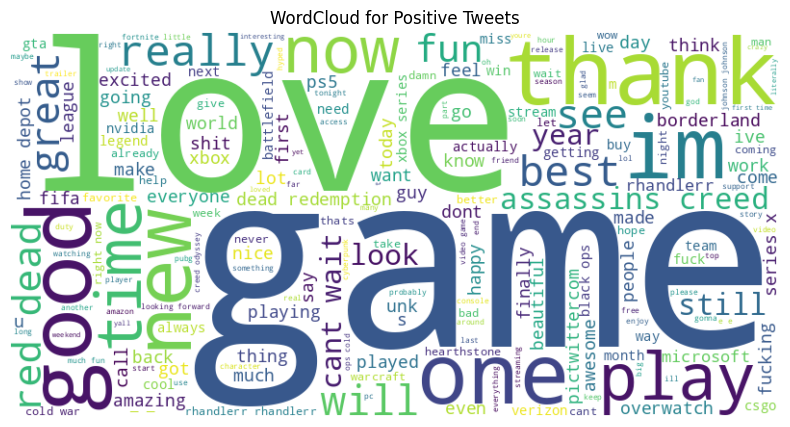

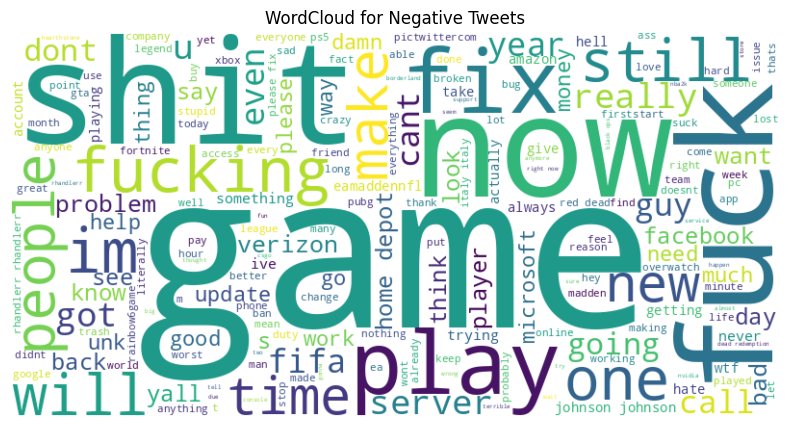

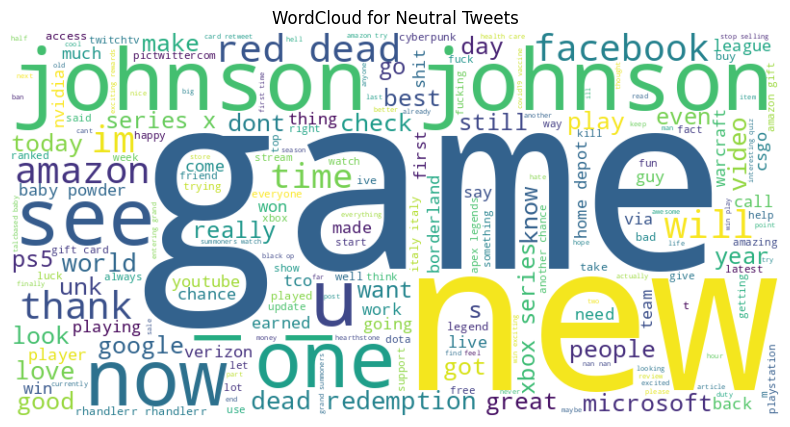

In [ ]:
# STEP 15: WordClouds for each sentiment
def show_wordcloud(label_name):
    text = " ".join(df[df["sentiment"] == label_name]["cleaned_tweet"].tolist())
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {label_name} Tweets")
    plt.show()

show_wordcloud("Positive")
show_wordcloud("Negative")
show_wordcloud("Neutral")

In [ ]:
# STEP 16: Save model and vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [ ]:
# STEP 17: Download saved model/vectorizer
files.download("sentiment_model.pkl")
files.download("tfidf_vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# STEP 18: Predict sentiment for user input
def preprocess_input(tweet):
    tweet = re.sub(r"http\S+|www\S+", "", str(tweet))  # Remove URLs
    tweet = re.sub(r"@\w+", "", tweet)                 # Remove mentions
    tweet = re.sub(r"#", "", tweet)                    # Remove hashtags
    tweet = re.sub(r"[^\w\s]", "", tweet)              # Remove punctuation
    return tweet.lower().strip()

def predict_sentiment(tweet):
    cleaned = preprocess_input(tweet)
    features = vectorizer.transform([cleaned])  # Use trained vectorizer
    prediction = model.predict(features)
    sentiment_label = le.inverse_transform(prediction)[0]  # Decode numeric label
    return sentiment_label

# Example usage
user_tweet = input("Enter a tweet to analyze: ")
predicted_sentiment = predict_sentiment(user_tweet)
print(f"Predicted Sentiment: {predicted_sentiment}")


Enter a tweet to analyze: iam very happy today 
Predicted Sentiment: Positive


In [ ]:
## simple web application for twitter sentiment analysis

In [ ]:
!pip install -q gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
import joblib
import os
import re
import numpy as np
import gradio as gr
from sklearn.preprocessing import LabelEncoder

# Load model and vectorizer
model_path = "sentiment_model.pkl"
vectorizer_path = "tfidf_vectorizer.pkl"

print("Model exists:", os.path.exists(model_path))
print("Vectorizer exists:", os.path.exists(vectorizer_path))

model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

# Cleaning function
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", "", str(text))
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text.lower().strip()

# LabelEncoder (match label order from training)
le = LabelEncoder()
le.classes_ = np.array(['Negative', 'Neutral', 'Positive'])

# Prediction function
def predict_sentiment(tweet):
    cleaned = clean_tweet(tweet)
    vect = vectorizer.transform([cleaned])

    print("Cleaned tweet:", cleaned)
    print("Vectorized shape:", vect.shape)

    prediction = model.predict(vect)
    sentiment = le.inverse_transform(prediction)[0]
    return sentiment

# Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Type or paste a tweet here..."),
    outputs="text",
    title="Twitter Sentiment Analysis",
    description="Enter a tweet to predict whether it is Positive, Negative, or Neutral."
)

interface.launch(share=True, debug=True)


Model exists: True
Vectorizer exists: True
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8b59390882c9596a33.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Cleaned tweet: iam very happy
Vectorized shape: (1, 5000)
Cleaned tweet: today going to held  a crucial ipl game
Vectorized shape: (1, 5000)
Cleaned tweet: its very exciting
Vectorized shape: (1, 5000)
